# LinearRegression
---
**算法名称： LinearRegression** 
    

**1. 类别**
    
    LinearRegression 属于监督学习算法的一种，即可用于分类 Classifier 也可以用于回归 Regressor。在本章，主要阐述一下sklearn中的三种用于回归（Regressor）的算法。
    
    - LinearRegression(OLS)
    - RidgeRegression(L2 Regularization) 
    - LassoRegression(L1 Regularization)
 
**2. 数学原理及证明**

    对于线性回归，通常使用如下线性多项式建立模型，进行预测分析。x[0]...x[n]是模型的特征，w[0]...w[n]是模型的权重（coefficient）, b是初始参数（intercepter）。建立模型就是通过计算x[n]找到最合适的w[n]和b 

                              y = w[0]*x[0] + w[1]*x[1] + .... + w[n]*x[n] + b 

至于如何找到最合适的w[n]和b，在sklearn中实现的三种线性回归模型，其优化目标函数如下：

    2.1 LinearRegression(OLS)
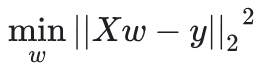

    2.2 RidgeRegression(L2 Regularization)
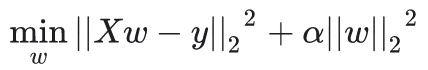
    
    2.3 LassoRegression(L1 Regularization)
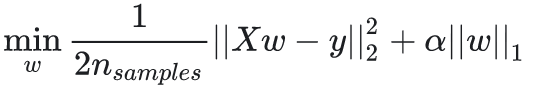

以下是具体的的方法实现：

- **最小二乘法**

最小二乘法（又称最小平方法）是一种数学优化技术。它通过最小化误差的平方和寻找数据的最佳函数匹配。利用最小二乘法可以简便地求得未知的数据，并使得这些求得的数据与实际数据之间误差的平方和为最小。最小二乘法还可用于曲线拟合。其他一些优化问题也可通过用最小二乘法来最小化能量或最大化熵等。

最常用的是普通最小二乘法（Ordinary Least Square，OLS）：所选择的回归模型应该使所有观察值的残差平方和达到最小。（Q为残差平方和）
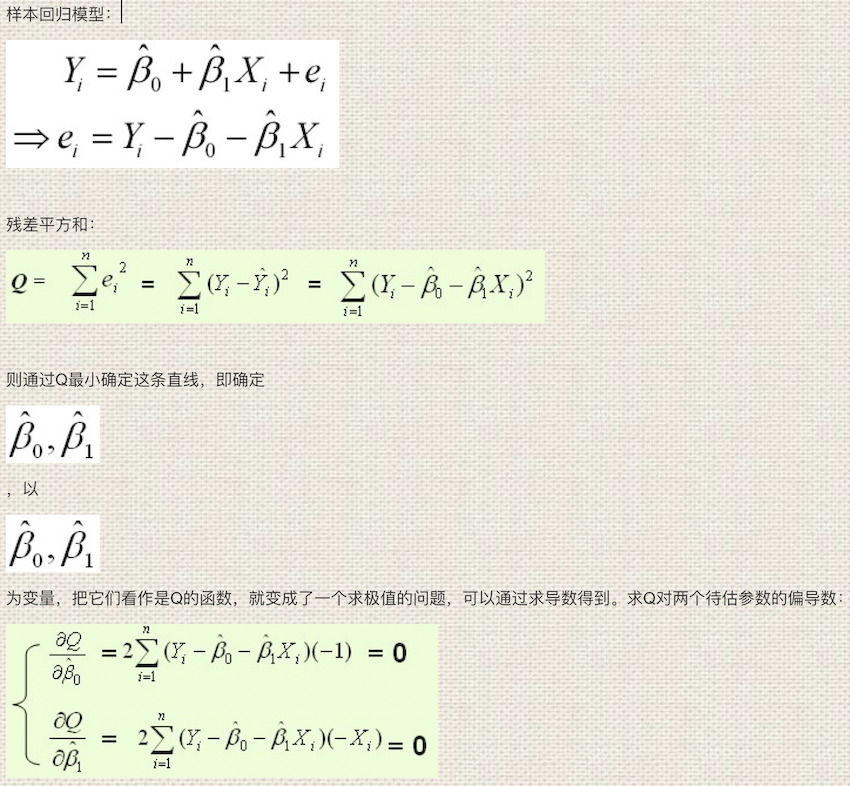
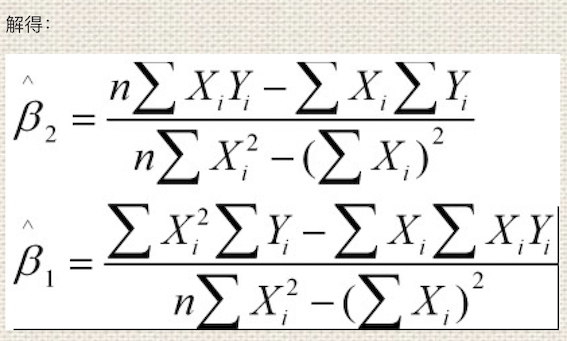

- **极大似然估计**

最大似然估计，只是一种概率论在统计学的应用，它是参数估计的方法之一。说的是已知某个随机样本满足某种概率分布，但是其中具体的参数不清楚，参数估计就是通过若干次试验，观察其结果，利用结果推出参数的大概值。最大似然估计是建立在这样的思想上：已知某个参数能使这个样本出现的概率最大，我们当然不会再去选择其他小概率的样本，所以干脆就把这个参数作为估计的真实值。

求最大似然函数估计值的一般步骤： 

（1）写出似然函数
（2）对似然函数取对数，并整理
（3）求导数
（4）解似然方程


- **梯度下降**

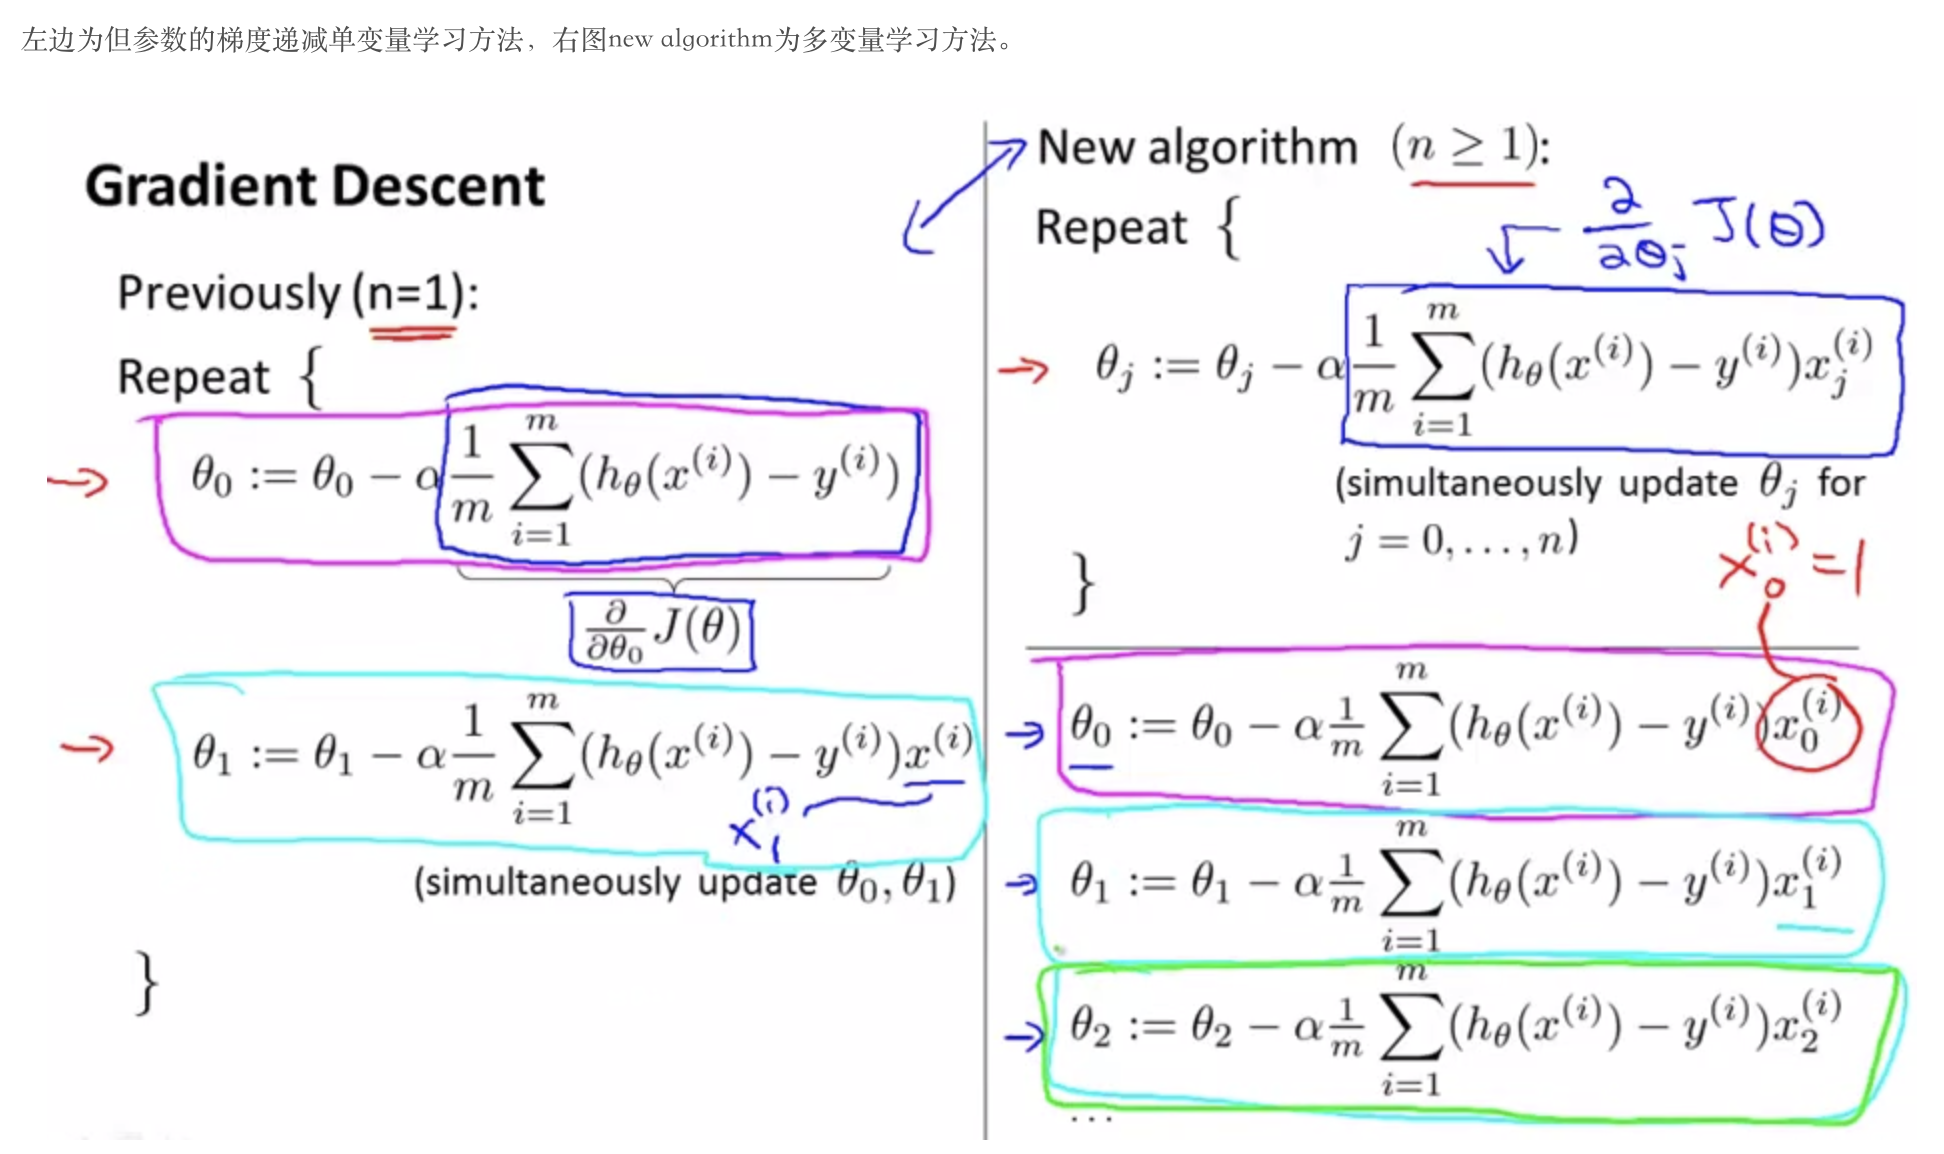

- 随机梯度下降法（Stochastic Gradient Descent）

随机梯度下降法，其实和批量梯度下降法原理类似，区别在与求梯度时没有用所有的m个样本的数据，而是仅仅选取一个样本j来求梯度。对应的更新公式是：
θi=θi−α(hθ(x(j)0,x(j)1,...x(j)n)−yj)x(j)i
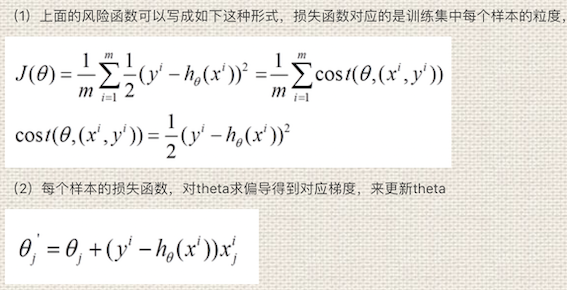
随机梯度下降法，和批量梯度下降法相比就是两个极端，一个采用所有数据来梯度下降，一个用一个样本来梯度下降。自然各自的优缺点都非常突出。对于训练速度来说，随机梯度下降法由于每次仅仅采用一个样本来迭代，训练速度很快，而批量梯度下降法在样本量很大的时候，训练速度不能让人满意。对于准确度来说，随机梯度下降法用于仅仅用一个样本决定梯度方向，导致解很有可能不是最优。对于收敛速度来说，由于随机梯度下降法一次迭代一个样本，导致迭代方向变化很大，不能很快的收敛到局部最优解。
    
- **批量梯度下降法（Batch Gradient Descent)**

批量梯度下降法，是梯度下降法最常用的形式，具体做法也就是在更新参数时使用所有的样本来进行更新，对应的更新公式是：
θi=θi−α∑j=0m(hθ(x(j)0,x(j)1,...x(j)n)−yj)x(j)i
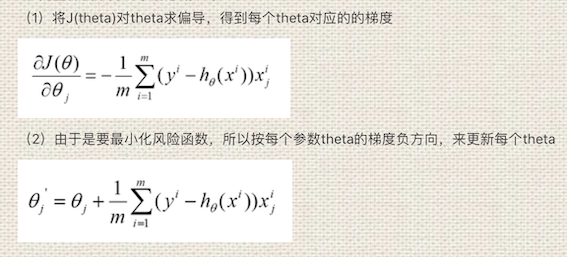
这里有m个样本，这里求梯度的时候就用了所有m个样本的梯度数据。
    
- **小批量梯度下降法（Mini-batch Gradient Descent）**

小批量梯度下降法是批量梯度下降法和随机梯度下降法的折衷，也就是对于m个样本，我们采用x个样子来迭代，1<x<m。一般可以取x=10，当然根据样本的数据，可以调整这个x的值。对应的更新公式是：
　　　　θi=θi−α∑j=tt+x−1(hθ(x(j)0,x(j)1,...x(j)n)−yj)x(j)i
    
- **牛顿法**

- **拟牛顿法**


在机器学习中的无约束优化算法，除了梯度下降以外，还有前面提到的最小二乘法，牛顿法和拟牛顿法。
梯度下降法和最小二乘法相比，梯度下降法需要选择步长，而最小二乘法不需要。梯度下降法是迭代求解，最小二乘法是计算解析解。如果样本量不算很大，且存在解析解，最小二乘法比起梯度下降法要有优势，计算速度很快。但是如果样本量很大，用最小二乘法由于需要求一个超级大的逆矩阵，这时就很难或者很慢才能求解解析解了，使用迭代的梯度下降法比较有优势。
梯度下降法和牛顿法/拟牛顿法相比，两者都是迭代求解，不过梯度下降法是梯度求解，而牛顿法/拟牛顿法是用二阶的海森矩阵的逆矩阵或伪逆矩阵求解。相对而言，使用牛顿法/拟牛顿法收敛更快。但是每次迭代的时间比梯度下降法长。
    
**3. 算法实现 scikit-learn**

```
sklearn.linear_model.LinearRegression(fit_intercept=True, 
                                      normalize=False, 
                                      copy_X=True, 
                                      n_jobs=None)

fit_intercept: whether to calculate the intercept for this model.
           
normalize: This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm

copy_X: If True, X will be copied; else, it may be overwritten.   

n_jobs: The number of jobs to use for the computation

----------------------
Refer to: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
```

**4. 算法关键参数及特点**
   - LinearRegression(OLS)
      > **Use All Features**
        
   - RidgeRegression(L2 Regularization) 

      > 参数： alpha = 1 #default, **Use All Features, Increase alpha, Model More Generalization** 
    
          >> underfitting < use all features < coefficients move more toward 0 < alpha higher 

          >> overfitting  < use all features < coefficients move less toward 0 < alpha lower  
          
| alpha | train score | test score | features used |
| --- | --- | --- | --- |
| 0.1 | 0.93 | __0.77__ | 104 |
| 1 | 0.89 | __0.75__ | 104 |
| 10 | 0.79 | __0.64__ | 104 |
    
   - LassoRegression(L1 Regularization)
        
      > alpha =1 #default, when you decrease alpha, you also need to increase "max_iter". **Use Some Of Features**
    
          >> underfitting < use less features < more coefficients = 0 < alpha higher 

          >> overfitting  < use more features < less coefficients = 0 < alpha lower 
          
| alpha | train score | test score | features used |
| --- | --- | --- | --- |
| 1 | __0.29__ | 0.21 | 4 |
| 0.01 | __0.90__ | 0.77 | 33 |
| 0.0001 | __0.95__ | 0.64 | 94 |

**5. 模型选择**

  - 对比LinearRegression, RidgeRegression和LassoRegression, 优选选择Ridge/Lasso,因为它们引入了Regularization优化模型，减少overfitting.    
  - 如果特征数一般，优先选择RidgeRegression  
  - 如果特征数过多，可以优先考虑LassoRegression
  
  
**6. Regularization**

  - L1 Regularization会迫使一些coefficients等于0，这样就相当于自动进行了特征选择，对于那些coefficients等于0的特征就过滤掉了。从计算上来说就是生成了洗漱的稀疏空间矩阵（sparse model）。     
  - L2 Regularization会迫使所有的coefficients无限逼近于0。所有的特征值都会通过一个因子进行收缩，并且会被计算。    
  - Elastic nets Regularization结合了L1 & L2,增加了一个超参数。 

**7. Refer to**

  - http://www.statisticshowto.com/regularization/
  - http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/
  - http://web.stanford.edu/~hastie/TALKS/enet_talk.pdf
  - https://scikit-learn.org/stable/modules/linear_model.html
  -
  
  
    

# LinearRegression Regressor

##  LinearRegression

Python version: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.24.2
matplotlib version: 3.0.3
numpy version: 1.16.2
scipy version: 1.2.1
IPython version: 7.4.0
sklearn version: 0.20.3


----------- Show linear graph with wave data set ---------------
w[0]: 0.393906  b: -0.031804


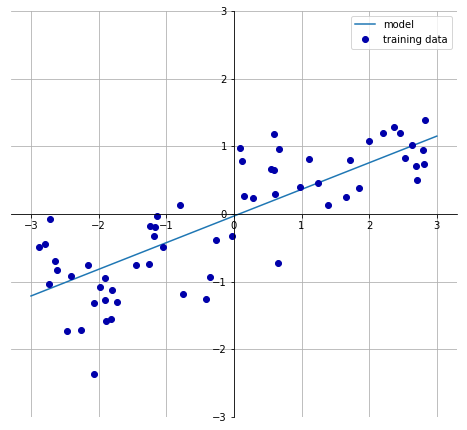

It's a typical singlar variable linear regression


In [23]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp 
print("scipy version: {}".format(sp.__version__))

import IPython 
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("sklearn version: {}".format(sklearn.__version__))

import warnings
warnings.filterwarnings("ignore")

import mglearn
import matplotlib.pyplot as plt

# show linear graph with wave data set 
print("\n")
print("----------- Show linear graph with wave data set ---------------")
mglearn.plots.plot_linear_regression_wave()
plt.show()
print("It's a typical singlar variable linear regression")


## LinearRegression on wave data set 

In [2]:
#########
#  For regression, the general prediction formula for a linear model looks as follows:
#
#      y = w[0]*x[0] + w[1]*x[1] + .... + w[n]*x[n] + b 
#
#  features: x[0]...x[n] 
#  coefficients: variable[coef_]       -->  slopes: weights  w[0]...w[n]
#  intercept:    variable[intercept_]  -->  b
#  
#########

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# use wave data set. Since it's only one feature. The formula equals to "y = w[0]*x[0] + b"
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print(lr)
print("\n")
print("-------------------------------------------------")
print("Coefficients: lr.coef_: {}".format(lr.coef_))
print("Intercept: lr.intercept_: {}".format(lr.intercept_))
print("\n")
print("-------------------------------------------------")
print("Traning set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


-------------------------------------------------
Coefficients: lr.coef_: [0.39390555]
Intercept: lr.intercept_: -0.031804343026759746


-------------------------------------------------
Traning set score: 0.67
Test set score: 0.66


---

# Generic Linear Regression on the Boston Housing data set 

---
## 1. LinearRegression - OLS (ordinary least squares最小二乘法 No Regularization)

In [3]:
# use boston extend data set
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("---------------------- Train/Test Data ----------------------------------")
print("Train Data Set: {}".format(X_train.shape))
print("Test Data set : {}".format(X_test.shape))
print("There are 104 features in Boston Housing data set")
print("\n")
print("---------------------- coef ----------------------------------")
print("Coefficients: lr.coef_: {}".format(lr.coef_.shape))
print("Coefficients: lr.coef_: {}".format(lr.coef_))
print("The number of features used: {}".format(np.sum(lr.coef_ !=0)))

print("\n")
print("----------------------- intercept --------------------------------")
print("Intercept: lr.intercept_: {}".format(lr.intercept_.shape))
print("Intercept: lr.intercept_: {}".format(lr.intercept_))
print("\n")
print("----------------------- scores on Train and Test --------------------------------")
print("Traning set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


---------------------- Train/Test Data ----------------------------------
Train Data Set: (379, 104)
Test Data set : (127, 104)
There are 104 features in Boston Housing data set


---------------------- coef ----------------------------------
Coefficients: lr.coef_: (104,)
Coefficients: lr.coef_: [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.

---
## 2. RidgeRegression - L2 Regularization 
Regularization is useful to avoid overfitting. RidgeRegression is known as "L2 Regularization". In RidgeRegression, we add additional constraint to coefficients, all entries of w (coefficiants) should be close to zero as far as possible. 

The parameter "alpha" is the key. Increasing alpha forces coefficients to move more toward zero.

> underfitting < use less features < more coefficients = 0 < alpha higher 

> overfitting  < use more features < less coefficients = 0 < alpha lower  

In [4]:
from sklearn.linear_model import Ridge

# The default alpha = 1 
ridge = Ridge().fit(X_train, y_train)
print("----------------- coef and intercept of ridge ------------------------")
print("Coefficients: ridge.coef_: {}".format(ridge.coef_))
print("Intercept: ridge.intercept_: {}".format(ridge.intercept_))
print("\n")
print("----------------- ridge model info ------------------------")
print(ridge)
print("----------------- scores on train and test ------------------------")
print("\n")
print("Alpha=1 Traning set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Alpha=1 Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(ridge.coef_ !=0)))


----------------- coef and intercept of ridge ------------------------
Coefficients: ridge.coef_: [-1.41368408e+00 -1.55661895e+00 -1.46543409e+00 -1.26616071e-01
 -7.91193605e-02  8.33161023e+00  2.54975060e-01 -4.94145701e+00
  3.89862268e+00 -1.05866058e+00 -1.58433734e+00  1.05103856e+00
 -4.01220799e+00  3.33720475e-01  3.64725471e-03 -8.49295793e-01
  7.44989267e-01 -1.43106836e+00 -1.62981017e+00 -1.40486294e+00
 -4.47314366e-02 -1.74619880e+00 -1.46715888e+00 -1.33237111e+00
 -1.69154625e+00 -5.06179637e-01  2.62197591e+00 -2.09210002e+00
  1.95074661e-01 -2.75469422e-01  5.11308202e+00 -1.67083739e+00
 -9.81863179e-02  6.34477127e-01 -6.10008281e-01  4.01805897e-02
 -1.27661999e+00 -2.91349679e+00  3.39544035e+00  7.91904036e-01
  1.35260232e+00 -4.03661265e+00  2.32361734e+00 -3.36712926e+00
  1.81279204e+00  3.01566897e+00 -1.89452070e+00 -2.50844073e-01
 -2.89543735e+00 -1.26616071e-01 -5.00217192e+00 -2.43951806e+00
  2.85071846e+00 -8.57081177e-01  2.99141960e+00  2.34589

In [5]:
# The alpha = 10 
ridge10 = Ridge(10).fit(X_train, y_train)

print("----------------- coef and intercept on ridge(10) model ------------------------")
print("Coefficients: ridge10.coef_: {}".format(ridge10.coef_))
print("Intercept: ridge10.intercept_: {}".format(ridge10.intercept_))
print("\n")
print("----------------- ridge(10) model info ------------------------")
print("Alpha=10 Traning set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Alpha=10 Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(ridge10.coef_ !=0)))

----------------- coef and intercept on ridge(10) model ------------------------
Coefficients: ridge10.coef_: [-8.11609631e-01  6.47608896e-01 -8.09783229e-01  3.11334709e-01
 -6.84623747e-01  4.38797575e+00 -1.47554474e-01 -2.44214065e+00
  8.45915099e-01 -1.14727508e+00 -2.33162040e+00  1.06787015e+00
 -3.98391025e+00 -5.98636976e-01  2.93228193e-03 -5.21253823e-01
  1.40339673e-01 -6.45256057e-01 -7.61400539e-01 -7.47231171e-01
 -3.86298005e-02 -8.29808059e-01 -7.52859756e-01 -6.75605899e-01
 -8.72001488e-01 -3.23330640e-01  1.27336327e+00 -3.37279550e-01
  6.30682038e-02  2.37092897e-01  2.09805607e+00  1.00996768e-01
 -2.79529662e-01  1.73222619e-01 -3.33557850e-01 -3.74226653e-01
  6.98414808e-01 -6.96284918e-01  7.79521010e-01  3.74843210e-01
 -6.24101244e-01 -7.63657605e-01  4.35756439e-02 -1.04000852e+00
  4.24401576e-01  4.78687021e-01 -3.84125445e-01 -9.93802653e-02
 -1.30226356e+00  3.11334709e-01 -5.92097637e-01  6.33816542e-01
  6.66792895e-01 -1.27959944e-01  1.35346930e

In [6]:
# The alpha = 0.1 
ridge01 = Ridge(0.1).fit(X_train, y_train)

print("----------------- coef and intercept on ridge(0.1) model ------------------------")
print("Coefficients: ridge01.coef_: {}".format(ridge01.coef_))
print("Intercept: ridge01.intercept_: {}".format(ridge01.intercept_))
print("\n")
print("----------------- ridge(0.1) model info ------------------------")
print("Alpha=0.1 Traning set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Alpha=0.1 Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(ridge01.coef_ !=0)))

----------------- coef and intercept on ridge(0.1) model ------------------------
Coefficients: ridge01.coef_: [-2.33300720e+00 -5.44192850e+00 -6.12865463e+00 -7.78524693e-01
  1.29152995e+00  1.90222839e+01  4.35864731e+00 -1.11911067e+01
  9.55539672e+00 -7.48671406e-01 -5.33307088e-01  6.23384946e+00
 -2.72886731e+00  5.86117121e+00  2.28233711e-02 -9.01608311e-01
  4.66756441e+00 -3.37983354e+00  1.31611460e+00 -3.48895554e+00
  4.41536215e-01 -3.51941085e+00 -2.52222659e+00 -2.69562070e+00
  2.44649480e-01 -1.02306604e+00  3.04223584e+00 -2.68804128e+00
  4.28396019e+00 -2.94109311e+00  8.70934702e+00 -3.13683472e+00
 -2.91608183e-01  2.17487375e+00  3.62658111e+00  2.30047840e+00
 -2.83789461e+00 -6.17207969e+00  7.94858912e+00  1.65631996e+00
  8.72779643e+00  1.08042552e+00  5.72208008e+00 -4.76401068e+00
  5.07461001e+00  8.01603635e+00 -8.44254041e+00 -6.44526450e-01
 -1.42288399e+01 -7.78524693e-01 -1.38982595e+01 -1.59298479e+01
  6.42600904e+00 -1.85273659e+00  6.37949850

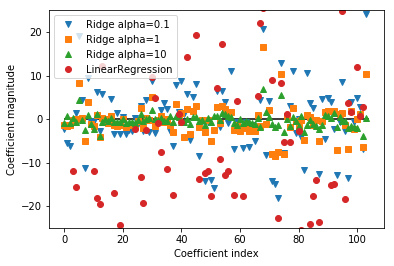

In [7]:
# Show graph to indicate coefficient is moving to zero by increasing alpha
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

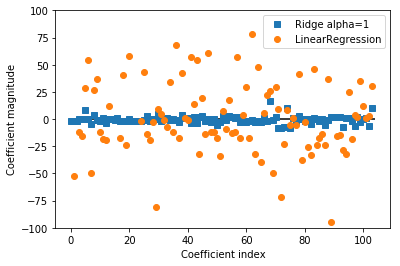

In [8]:
# Show graph to indicate the diffenet between LinearRegression and RidgeRegression
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-100, 100)
plt.legend()
plt.show()

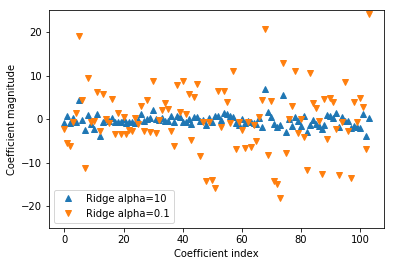

In [9]:
# Show graph to indicate coefficient is moving to zero by increasing alpha
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-25, 25)
plt.legend()
plt.show()

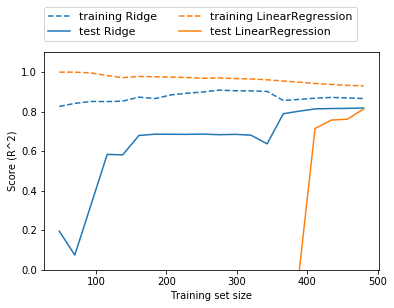

In [10]:
################ 
# Learning curves for ridge regression and linear regression on the Boston Housing dataset. 
#
# 1. Because of regularization, the score of RidgeRegression is still less than the score of training LinearRegression
#    Training score: Ridge < LinearRegression  
# 2. The test score is better for Ridge Regression especially for small data set. 
#    Please refer to the chart when traning set size < 400
# 3. Both of them are going to the same performance finally after increasing trainning data set
#
################ 

mglearn.plots.plot_ridge_n_samples()
plt.show()

---
## 3. RidgeCV

Ridge regression with built-in cross-validation.

```
sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), 
                             fit_intercept=True, 
                             normalize=False, 
                             scoring=None, 
                             cv=None, 
                             gcv_mode=None, 
                             store_cv_values=False)
                                  
```
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV   

In [11]:
from sklearn.linear_model import RidgeCV

# The default alpha = 1 
ridgecv = RidgeCV().fit(X_train, y_train)
print("----------------- coef and intercept of ridgecv ------------------------")
print("Coefficients: ridgecv.coef_: {}".format(ridgecv.coef_))
print("Intercept: ridgecv.intercept_: {}".format(ridgecv.intercept_))
print("\n")
print("----------------- ridgecv model info ------------------------")
print(ridgecv)
print("----------------- scores on train and test ------------------------")
print("\n")
print("Traning set score: {:.2f}".format(ridgecv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridgecv.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(ridgecv.coef_ !=0)))

----------------- coef and intercept of ridgecv ------------------------
Coefficients: ridgecv.coef_: [-2.33300720e+00 -5.44192850e+00 -6.12865463e+00 -7.78524693e-01
  1.29152995e+00  1.90222839e+01  4.35864731e+00 -1.11911067e+01
  9.55539672e+00 -7.48671406e-01 -5.33307088e-01  6.23384946e+00
 -2.72886731e+00  5.86117121e+00  2.28233711e-02 -9.01608311e-01
  4.66756441e+00 -3.37983354e+00  1.31611460e+00 -3.48895554e+00
  4.41536215e-01 -3.51941085e+00 -2.52222659e+00 -2.69562070e+00
  2.44649480e-01 -1.02306604e+00  3.04223584e+00 -2.68804128e+00
  4.28396019e+00 -2.94109311e+00  8.70934702e+00 -3.13683472e+00
 -2.91608183e-01  2.17487375e+00  3.62658111e+00  2.30047840e+00
 -2.83789461e+00 -6.17207969e+00  7.94858912e+00  1.65631996e+00
  8.72779643e+00  1.08042552e+00  5.72208008e+00 -4.76401068e+00
  5.07461001e+00  8.01603635e+00 -8.44254041e+00 -6.44526450e-01
 -1.42288399e+01 -7.78524693e-01 -1.38982595e+01 -1.59298479e+01
  6.42600904e+00 -1.85273659e+00  6.37949850e+00  4.0

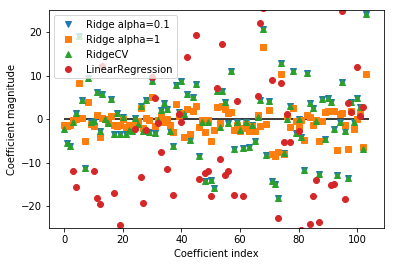

In [12]:
# Show graph to indicate coefficient is moving to zero by increasing alpha
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridgecv.coef_, '^', label="RidgeCV")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

---
## 4. LassoRegression - L1 Regularization
Regularization is useful to avoid overfitting. LassoRegression is known as "L1 Regularization". In LassoRegression, we can have some coefficients to be exactly zero. It means that we ignroe some features or our model automatically select some features. It makes a model easier to interpret and can revel the most important features of your model.

The parameter "alpha", which is 1.0 in default, controls how strongly coefficients are pushed toward zero. Increasing alpha forces coefficients to move more toward zero. 

> underfitting < use less features < more coefficients = 0 < alpha higher 

> overfitting  < use more features < less coefficients = 0 < alpha lower  

In [13]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("----------------- coef and intercept on lasso model ------------------------")
print("Coefficients: lasso.coef_: {}".format(lasso.coef_))
print("Intercept: lasso.intercept_: {}".format(lasso.intercept_))
print("\n")
print("----------------- lasso model info ------------------------")
print(lasso)
print("\n")
print("----------------- scors on Train and Test data for lasso model ------------------------")
print("\n")
print("Alpha=1.0 Traning set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Alpha=1.0 Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(lasso.coef_ !=0)))

----------------- coef and intercept on lasso model ------------------------
Coefficients: lasso.coef_: [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -5.3529079  -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -1.05063037 -3.3104274  -0.         -0

In [14]:
# we increase the default setting of "max_iter"
# otherwise the model would warn us that we should increase max_iter. 

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("----------------- scors on Train and Test data for lasso(alpha=0.01, max_iter=100000) model ------------------------")
print("\n")
print("Alpha=0.01 Traning set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Alpha=0.01 Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(lasso001.coef_ !=0)))

----------------- scors on Train and Test data for lasso(alpha=0.01, max_iter=100000) model ------------------------


Alpha=0.01 Traning set score: 0.90
Alpha=0.01 Test set score: 0.77
---------------------------------------------------------------
The number of features used: 33


In [15]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("----------------- scors on Train and Test data for lasso(alpha=0.0001, max_iter=100000) model ----------------------")
print("\n")
print("Alpha=0.0001 Traning set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Alpha=0.0001 Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(lasso00001.coef_ !=0)))

----------------- scors on Train and Test data for lasso(alpha=0.0001, max_iter=100000) model ----------------------


Alpha=0.0001 Traning set score: 0.95
Alpha=0.0001 Test set score: 0.64
---------------------------------------------------------------
The number of features used: 96


In [16]:
lasso00001_2 = Lasso(alpha=0.0001, max_iter=1000).fit(X_train, y_train)

print("----------------- scors on Train and Test data for lasso(alpha=0.0001, max_iter=1000) model ----------------------")
print("\n")
print("Alpha=0.0001 Traning set score: {:.2f}".format(lasso00001_2.score(X_train, y_train)))
print("Alpha=0.0001 Test set score: {:.2f}".format(lasso00001_2.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(lasso00001_2.coef_ !=0)))

----------------- scors on Train and Test data for lasso(alpha=0.0001, max_iter=1000) model ----------------------


Alpha=0.0001 Traning set score: 0.94
Alpha=0.0001 Test set score: 0.70
---------------------------------------------------------------
The number of features used: 100


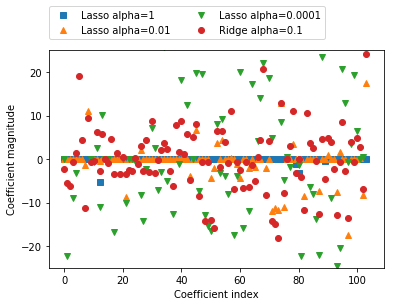

In [17]:
# Show graph to indicate coefficient is moving to zero by increasing alpha
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))
plt.show()

---
## 5. LassoCV 

LassoCV is using Lasso + Cross-Validation togerther. The best model is selected by cross-validation.

---

```
sklearn.linear_model.LassoCV(eps=0.001, 
                             n_alphas=100, 
                             alphas=None, 
                             fit_intercept=True, 
                             normalize=False, 
                             precompute=’auto’, 
                             max_iter=1000, 
                             tol=0.0001, 
                             copy_X=True, 
                             cv=’warn’, 
                             verbose=False, 
                             n_jobs=None, 
                             positive=False, 
                             random_state=None, 
                             selection=’cyclic’)
```
                                   
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV



In [18]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV().fit(X_train, y_train)

print("----------------- coef and intercept on lassocv model ------------------------")
print("Coefficients: lassocv.coef_: {}".format(lassocv.coef_))
print("Intercept: lassocv.intercept_: {}".format(lassocv.intercept_))
print("\n")

print("----------------- lassocv model info ------------------------")
print(lassocv)
print("\n")

print("----------------- scors on Train and Test data for lassocv model ----------------------")
print("\n")
print("Traning set score: {:.2f}".format(lassocv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lassocv.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(lassocv.coef_ !=0)))

----------------- coef and intercept on lassocv model ------------------------
Coefficients: lassocv.coef_: [ -0.          -5.44078541  -0.          -0.           0.
  44.04871543   9.03633284  -0.73775957   3.10007346  -0.
   3.29219382  10.6730475   -0.           3.83235378   0.
  -0.           0.          -0.           0.          -1.51772522
   0.         -12.22784883  -0.          -0.          -0.
  -0.           3.03065862  -0.           0.          -0.
   3.22724774  -0.14699427  -0.           0.           5.68247119
   0.           0.          -7.28761599  11.59895198   0.
  17.41772076   0.           6.76556467  -0.          -1.97319359
   0.         -18.0171743   -2.34353594 -26.89491486  -0.
 -14.19621964 -19.93573238   4.93232163  -0.           4.30646585
   7.40989501  -0.          13.29609216  -8.74724447  -0.30184459
  -0.          -8.43475345   0.         -15.5791923   -0.
  -0.          -0.           0.21517477  15.26543396 -18.84610018
   0.         -10.1292528  -22.3

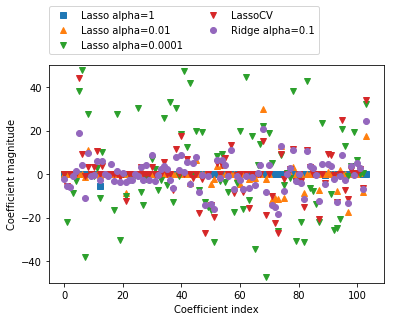

In [19]:
# Show graph to indicate coefficient is moving to zero by increasing alpha
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(lassocv.coef_, 'v', label="LassoCV")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-50, 50)
plt.legend(ncol=2, loc=(0, 1.05))
plt.show()

---
## 6. LassoLarsCV 

This is Cross-Validationed Lasso using the LARS algorithm.

---

```
sklearn.linear_model.LassoLarsCV(fit_intercept=True, 
                                 verbose=False, 
                                 max_iter=500, 
                                 normalize=True, 
                                 precompute=’auto’, 
                                 cv=’warn’, 
                                 max_n_alphas=1000, 
                                 n_jobs=None, 
                                 eps=2.220446049250313e-16, 
                                 copy_X=True, 
                                 positive=False)
                                   
```

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsCV.html#sklearn.linear_model.LassoLarsCV


In [20]:
from sklearn.linear_model import LassoLarsCV 
lassolarcv = LassoLarsCV ().fit(X_train, y_train)

print("----------------- coef and intercept on lassolarcv model ------------------------")
print("Coefficients: lassolarcv.coef_: {}".format(lassolarcv.coef_))
print("Intercept: lassolarcv.intercept_: {}".format(lassolarcv.intercept_))
print("\n")

print("----------------- lassocv model info ------------------------")
print(lassolarcv)
print("\n")

print("----------------- scors on Train and Test data for lassolarcv model ----------------------")
print("\n")
print("Traning set score: {:.2f}".format(lassolarcv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lassolarcv.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(lassolarcv.coef_ !=0)))

----------------- coef and intercept on lassolarcv model ------------------------
Coefficients: lassolarcv.coef_: [  0.           0.           0.           0.           0.
  30.77515549   0.         -22.50947483   0.           0.
   0.99903379   0.           0.          10.3911201    0.
   0.         161.31333781 -33.93332427   0.           0.
  34.23878295   0.           0.           0.           0.
   0.           0.          -6.98485958   0.         -25.31883567
   1.8680424    0.           0.           0.           6.20582492
   2.90190975   0.         -19.16838276   6.30601855   0.40006796
   1.11510683   0.           2.20448401 -20.81955333   4.30309944
   8.12376539   0.           0.         -22.66680059   0.
 -14.91462267 -18.60717951   4.85765137   0.           0.
   0.          -0.56094745  14.79299708 -11.48930302   0.
  -3.50200015   0.           2.25457116   0.           0.
  -6.77161793   0.           0.          23.19834332 -11.61502312
   0.          -3.27009452 -23.407

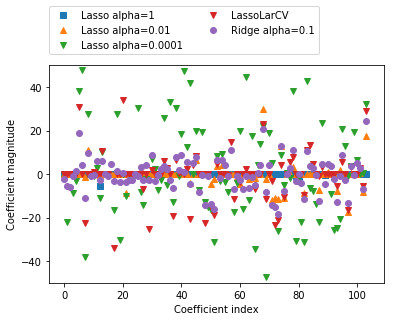

In [21]:
# Show graph to indicate coefficient is moving to zero by increasing alpha
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(lassolarcv.coef_, 'v', label="LassoLarCV")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-50, 50)
plt.legend(ncol=2, loc=(0, 1.05))
plt.show()

---
## 7. MultiTaskLasso 

Multi-task Lasso model trained with L1/L2 mixed-norm as regularizer.


The normal lasso estimators does not support multiple targets. But MultiTaskLasso will support. So we will encounter the following errors in exapm

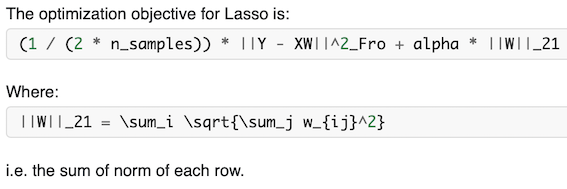

---

```
sklearn.linear_model.MultiTaskLasso(alpha=1.0, 
                                    fit_intercept=True, 
                                    normalize=False, 
                                    copy_X=True, 
                                    max_iter=1000, 
                                    tol=0.0001, 
                                    warm_start=False, 
                                    random_state=None, 
                                    selection=’cyclic’)
                                   
```

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskLasso.html#sklearn.linear_model.MultiTaskLasso


In [22]:
from sklearn.linear_model import MultiTaskLasso 

multi_task_lasso = MultiTaskLasso(alpha=1.1).fit(X_train, y_train)

print("----------------- coef and intercept on MultiTaskLasso model ------------------------")
print("Coefficients: multi_task_lasso.coef_: {}".format(multi_task_lasso.coef_))
print("Intercept: multi_task_lasso.intercept_: {}".format(multi_task_lasso.intercept_))
print("\n")

print("----------------- multi_task_lasso model info ------------------------")
print(multi_task_lasso)
print("\n")

print("----------------- scors on Train and Test data for multi_task_lasso model ----------------------")
print("\n")
print("Traning set score: {:.2f}".format(multi_task_lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(multi_task_lasso.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(multi_task_lasso.coef_ !=0)))

ValueError: For mono-task outputs, use ElasticNet

---
## 8. MultiTaskLassoCV 

Multi-task Lasso model trained with L1/L2 mixed-norm as regularizer, with cross-validation to select the best model.

---

```
sklearn.linear_model.MultiTaskLassoCV(eps=0.001, 
                                      n_alphas=100, 
                                      alphas=None, 
                                      fit_intercept=True, 
                                      normalize=False, 
                                      max_iter=1000, 
                                      tol=0.0001, 
                                      copy_X=True, 
                                      cv=’warn’, 
                                      verbose=False, 
                                      n_jobs=None, 
                                      random_state=None, 
                                      selection=’cyclic’)      
                                   
```

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskLassoCV.html#sklearn.linear_model.MultiTaskLassoCV

In [24]:
from sklearn.linear_model import MultiTaskLassoCV 

multi_task_lasso_cv = MultiTaskLassoCV(cv=5).fit(X_train, y_train)

print("----------------- coef and intercept on MultiTaskLassoCV model ------------------------")
print("Coefficients: multi_task_lasso_cv.coef_: {}".format(multi_task_lasso_cv.coef_))
print("Intercept: multi_task_lasso_cv.intercept_: {}".format(multi_task_lasso_cv.intercept_))
print("\n")

print("----------------- multi_task_lasso_cv model info ------------------------")
print(multi_task_lasso_cv)
print("\n")

print("----------------- scors on Train and Test data for multi_task_lasso model ----------------------")
print("\n")
print("Traning set score: {:.2f}".format(multi_task_lasso_cv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(multi_task_lasso_cv.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(multi_task_lasso_cv.coef_ !=0)))

ValueError: For mono-task outputs, use LassoCV

---
## 9. LAR (Least Angle Regression model)
---

```
sklearn.linear_model.Lars(fit_intercept=True, 
                          verbose=False, 
                          normalize=True, 
                          precompute=’auto’, 
                          n_nonzero_coefs=500, 
                          eps=2.220446049250313e-16, 
                          copy_X=True, 
                          fit_path=True, 
                          positive=False)
```

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lars.html#sklearn.linear_model.Lars


In [25]:
from sklearn.linear_model import Lars

reg_lar = Lars(n_nonzero_coefs=1)
lar = reg_lar.fit(X_train, y_train)

print("----------------- coef and intercept on LAR model (n_nonzero_coefs=1) ------------------------")
print("Coefficients: lar.coef_: {}".format(lar.coef_))
print("Intercept: lar.intercept_: {}".format(lar.intercept_))
print("\n")

print("----------------- lar model info ------------------------")
print(lar)
print("\n")

print("----------------- scors on Train and Test data for lar model ----------------------")
print("\n")
print("(n_nonzero_coefs=1) Traning set score: {:.2f}".format(lar.score(X_train, y_train)))
print("(n_nonzero_coefs=1) Test set score: {:.2f}".format(lar.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(lar.coef_ !=0)))

----------------- coef and intercept on LAR model (n_nonzero_coefs=1) ------------------------
Coefficients: lar.coef_: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -2.27933443  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.       

In [26]:
from sklearn.linear_model import Lars

reg_lar_10 = Lars(n_nonzero_coefs=10)
lar10 = reg_lar_10.fit(X_train, y_train)

print("----------------- coef and intercept on LAR model (n_nonzero_coefs=10) ------------------------")
print("Coefficients: lar10.coef_: {}".format(lar10.coef_))
print("Intercept: lar10.intercept_: {}".format(lar10.intercept_))
print("\n")

print("----------------- lar10 model info ------------------------")
print(lar10)
print("\n")

print("----------------- scors on Train and Test data for lar10 model ----------------------")
print("\n")
print("(n_nonzero_coefs=10) Traning set score: {:.2f}".format(lar10.score(X_train, y_train)))
print("(n_nonzero_coefs=10) Test set score: {:.2f}".format(lar10.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(lar10.coef_ !=0)))

----------------- coef and intercept on LAR model (n_nonzero_coefs=10) ------------------------
Coefficients: lar10.coef_: [  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.          60.37863343   0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.         -24.09638014  29.05575069   0.
   0.           0.           0.           0.           4.80641535

In [27]:
from sklearn.linear_model import Lars

reg_lar_100 = Lars(n_nonzero_coefs=100)
lar100 = reg_lar_100.fit(X_train, y_train)

print("----------------- coef and intercept on LAR model (n_nonzero_coefs=100) ------------------------")
print("Coefficients: lar100.coef_: {}".format(lar100.coef_))
print("Intercept: lar100.intercept_: {}".format(lar100.intercept_))
print("\n")

print("----------------- lar100 model info ------------------------")
print(lar100)
print("\n")

print("----------------- scors on Train and Test data for lar100 model ----------------------")
print("\n")
print("(n_nonzero_coefs=100) Traning set score: {:.2f}".format(lar100.score(X_train, y_train)))
print("(n_nonzero_coefs=100) Test set score: {:.2f}".format(lar100.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(lar100.coef_ !=0)))

----------------- coef and intercept on LAR model (n_nonzero_coefs=100) ------------------------
Coefficients: lar100.coef_: [      0.               0.               0.               0.
  116371.07145393  681682.7729661        0.          598250.53690625
       0.            5003.18775708       0.          113558.63996941
  707955.40574724  -73530.45959286       0.               0.
  109682.39368207       0.          109932.68314356       0.
       0.               0.               0.               0.
       0.           24718.97918045    2586.62566728   -3648.86318626
   21313.77821479  342156.25469738       0.          -56327.39968238
       0.          -50683.55962936    5638.56551131   -7176.01282641
       0.          -74125.95755845       0.          120225.70167493
   82055.98160533       0.               0.         -142113.73585418
       0.          -87298.47537427       0.           76948.48074397
 -202466.8151063        0.           30989.90169774       0.
       0.         

---
## 10. LarsCV
---

Cross-validated Least Angle Regression model.
```
sklearn.linear_model.LarsCV(fit_intercept=True,
                            verbose=False, 
                            max_iter=500, 
                            normalize=True, 
                            precompute=’auto’, 
                            cv=’warn’, 
                            max_n_alphas=1000, 
                            n_jobs=None, 
                            eps=2.220446049250313e-16, 
                            copy_X=True, 
                            positive=False)                                  
```

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LarsCV.html#sklearn.linear_model.LarsCV

In [28]:
from sklearn.linear_model import LarsCV

larcv = LarsCV(cv=5).fit(X_train, y_train)

print("----------------- coef and intercept on LarsCV model (cv=5) ------------------------")
print("Coefficients: lar.coef_: {}".format(larcv.coef_))
print("Intercept: lar.intercept_: {}".format(larcv.intercept_))
print("\n")

print("----------------- larcv model info ------------------------")
print(larcv)
print("\n")

print("----------------- scors on Train and Test data for larcv model ----------------------")
print("\n")
print("Traning set score: {:.2f}".format(larcv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(larcv.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(larcv.coef_ !=0)))

----------------- coef and intercept on LarsCV model (cv=5) ------------------------
Coefficients: lar.coef_: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Intercept: lar.intercept_: 22.608707124010557


----------------- larcv model info ------------------------
LarsCV(copy_X=True, cv=5, eps=2.220446049250313e-16, fit_intercept=True,
    max_iter=500, max_n_alphas=1000, n_jobs=None, normalize=True,
    positive=False, precompute='auto', verbose=False)


----------------- scors on Train and Test data for larcv model ----------------------


Traning set score: 0.00
Test set score: -0.00
---------------------------------------------------------------
The number of features used: 0


---
## 11. OrthogonalMatchingPursuit 
---

```
sklearn.linear_model.OrthogonalMatchingPursuit(n_nonzero_coefs=None, 
                                               tol=None, 
                                               fit_intercept=True, 
                                               normalize=True, 
                                               precompute=’auto’)                                
```

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.OrthogonalMatchingPursuit.html#sklearn.linear_model.OrthogonalMatchingPursuit


In [29]:
from sklearn.linear_model import OrthogonalMatchingPursuit

omp = OrthogonalMatchingPursuit().fit(X_train, y_train)

print("----- coef and intercept on OrthogonalMatchingPursuit model -----")
print("Coefficients: omp.coef_: {}".format(omp.coef_))
print("Intercept: omp.intercept_: {}".format(omp.intercept_))
print("\n")

print("----------------- omp model info ------------------------")
print(omp)
print("\n")

print("----------------- scors on Train and Test data for omp model ----------------------")
print("\n")
print("Traning set score: {:.2f}".format(omp.score(X_train, y_train)))
print("Test set score: {:.2f}".format(omp.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(omp.coef_ !=0)))

----- coef and intercept on OrthogonalMatchingPursuit model -----
Coefficients: omp.coef_: [  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.         -15.36520176   0.           0.
   0.         124.28307067   0.         -27.17130617   0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.         -27.33188476   0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
 -19.82305999   0.           0.           0.           0.
   0.           0.           0.          38.85353017   0.
   0.           0.           0.         -19.54440445   0.
   0.           0.          -6.48892293

---
## 12. OrthogonalMatchingPursuitCV
---

```
sklearn.linear_model.OrthogonalMatchingPursuitCV(copy=True, 
                                                 fit_intercept=True, 
                                                 normalize=True, 
                                                 max_iter=None, 
                                                 cv=’warn’, 
                                                 n_jobs=None, 
                                                 verbose=False)
```

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.OrthogonalMatchingPursuitCV.html#sklearn.linear_model.OrthogonalMatchingPursuitCV


In [30]:
from sklearn.linear_model import OrthogonalMatchingPursuitCV

ompcv = OrthogonalMatchingPursuitCV().fit(X_train, y_train)

print("----- coef and intercept on OrthogonalMatchingPursuitCV model -----")
print("Coefficients: ompcv.coef_: {}".format(ompcv.coef_))
print("Intercept: ompcv.intercept_: {}".format(ompcv.intercept_))
print("\n")

print("----------------- ompcv model info ------------------------")
print(ompcv)
print("\n")

print("----------------- scors on Train and Test data for ompcv model ----------------------")
print("\n")
print("Traning set score: {:.2f}".format(ompcv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ompcv.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(ompcv.coef_ !=0)))

----- coef and intercept on OrthogonalMatchingPursuitCV model -----
Coefficients: ompcv.coef_: [  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.         -21.45995921   0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.          30.91321911   0.
   0.           0.           0.         -20.08180754   0.
   0.           0.           0.    

---
## 13. PassiveAggressiveRegressor
---

```
sklearn.linear_model.PassiveAggressiveRegressor(C=1.0, 
                                                fit_intercept=True, 
                                                max_iter=None, 
                                                tol=None, 
                                                early_stopping=False, 
                                                validation_fraction=0.1, 
                                                n_iter_no_change=5, 
                                                shuffle=True, 
                                                verbose=0, 
                                                loss=’epsilon_insensitive’, 
                                                epsilon=0.1, 
                                                random_state=None, 
                                                warm_start=False, 
                                                average=False, 
                                                n_iter=None)   
                                  
```

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveRegressor.html#sklearn.linear_model.PassiveAggressiveRegressor


In [31]:
from sklearn.linear_model import PassiveAggressiveRegressor

par = PassiveAggressiveRegressor(max_iter=100, random_state=0, tol=1e-3).fit(X_train, y_train)

print("----- coef and intercept on PassiveAggressiveRegressor model (max_iter=100, random_state=0, tol=1e-3) -----")
print("Coefficients: par.coef_: {}".format(par.coef_))
print("Intercept: par.intercept_: {}".format(par.intercept_))
print("\n")

print("----------------- par model info ------------------------")
print(par)
print("\n")

print("----------------- scors on Train and Test data for par model ----------------------")
print("\n")
print("Traning set score: {:.2f}".format(par.score(X_train, y_train)))
print("Test set score: {:.2f}".format(par.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(par.coef_ !=0)))

----- coef and intercept on PassiveAggressiveRegressor model (max_iter=100, random_state=0, tol=1e-3) -----
Coefficients: par.coef_: [-1.42434745e+00 -2.15735802e+00 -3.18764060e-01 -1.16890286e+00
  1.71193526e+00  1.18462447e+01  3.74677753e+00 -4.19529680e+00
  4.75295286e+00 -4.25136637e-01  1.14917053e+00  4.60650849e+00
 -1.44439314e+00 -8.72360798e-01  3.68994292e-03 -8.70174760e-01
  4.53208638e-01 -1.73894270e+00 -2.36701763e+00 -1.50710145e+00
  3.92787844e-02 -1.96281072e+00 -1.60623366e+00 -1.44851085e+00
 -2.09549025e+00 -8.74667789e-01  3.63831977e+00 -2.75505905e+00
  7.19694911e-02 -9.61840930e-01  6.02683243e+00 -2.73970506e+00
  2.73628347e-01  2.19154558e-01 -1.07183734e+00 -1.69970356e-01
 -1.85411462e+00 -4.15209341e+00  5.32339938e+00  6.00575117e-01
  2.77535013e+00 -6.45209843e+00  2.91815338e+00 -4.08846667e+00
  1.81566484e+00  4.55078120e+00 -4.08417031e+00 -3.68521198e+00
 -2.57337224e+00 -1.16890286e+00 -3.19012171e+00 -1.53320739e+00
  8.40222865e-01 -3.96

---
## 14. SGDRegressor 
---

Linear model fitted by minimizing a regularized empirical loss with SGD

SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).
The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.
This implementation works with data represented as dense numpy arrays of floating point values for the features.

```
sklearn.linear_model.SGDRegressor(loss=’squared_loss’,
                                  penalty=’l2’, 
                                  alpha=0.0001, 
                                  l1_ratio=0.15, 
                                  fit_intercept=True, 
                                  max_iter=None, 
                                  tol=None, 
                                  shuffle=True, 
                                  verbose=0, 
                                  epsilon=0.1, 
                                  random_state=None, 
                                  learning_rate=’invscaling’, 
                                  eta0=0.01, 
                                  power_t=0.25,
                                  early_stopping=False, 
                                  validation_fraction=0.1, 
                                  n_iter_no_change=5, 
                                  warm_start=False, 
                                  average=False, 
                                  n_iter=None
```

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor


In [32]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(max_iter=1000, tol=1e-3).fit(X_train, y_train)

print("----------------- coef and intercept on SGDRegressor model (max_iter=1000, tol=1e-3) ------------------------")
print("Coefficients: sgdr.coef_: {}".format(sgdr.coef_))
print("Intercept: sgdr.intercept_: {}".format(sgdr.intercept_))
print("\n")

print("----------------- sgdr model info ------------------------")
print(sgdr)
print("\n")

print("----------------- scors on Train and Test data for sgdr model ----------------------")
print("\n")
print("Traning set score: {:.2f}".format(sgdr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(sgdr.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(sgdr.coef_ !=0)))

----------------- coef and intercept on SGDRegressor model (max_iter=1000, tol=1e-3) ------------------------
Coefficients: sgdr.coef_: [-1.13020208e+00  5.91401013e-01  1.49491105e+00  2.28115715e-01
  1.27469282e+00  9.05552015e+00  2.92822153e+00 -2.17883140e+00
  3.20542104e+00  5.12173820e-01  4.92426603e-01  6.47899836e+00
 -3.01376815e+00 -1.03250307e+00  5.04074025e-03 -7.32903246e-01
  2.31187795e-01 -1.06203468e+00 -1.59370648e+00 -1.10397154e+00
 -4.70180312e-02 -1.25655149e+00 -1.11558718e+00 -1.00228662e+00
 -2.02876334e+00 -2.52984465e-01  1.60441007e+00 -6.29319052e-01
  3.01007272e-02  3.11307815e-01  3.22219445e+00 -2.83368899e-01
 -1.02251696e+00  2.03205997e-01 -6.32230379e-01 -1.17134022e+00
  6.37635364e-01 -1.27197690e+00  2.06138458e+00  3.92896292e-01
 -3.96914725e-01 -2.20330926e+00  5.96672341e-01 -1.23317279e+00
  1.21661603e+00  1.41619974e+00 -5.29981122e-01 -1.44037620e+00
 -1.17499268e+00  2.28115715e-01 -1.51361366e+00  3.05603946e-01
  9.38101720e-01 -2

---
## 15. TheilSenRegressor 
---

Theil-Sen Estimator: robust multivariate regression model.

The algorithm calculates **least square solutions** on **subsets with size n_subsamples** of the samples in X. Any value of n_subsamples between the number of features and samples leads to an estimator with a compromise between robustness and efficiency. Since the number of least square solutions is “n_samples choose n_subsamples”, it can be extremely large and can therefore be limited with max_subpopulation. If this limit is reached, the subsets are chosen randomly. In a final step, the spatial median (or L1 median) is calculated of all least square solutions.


```
sklearn.linear_model.TheilSenRegressor(fit_intercept=True, 
                                       copy_X=True, 
                                       max_subpopulation=10000.0, 
                                       n_subsamples=None, 
                                       max_iter=300, 
                                       tol=0.001, 
                                       random_state=None, 
                                       n_jobs=None, 
                                       verbose=False)

```
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html#sklearn.linear_model.TheilSenRegressor


In [33]:
from sklearn.linear_model import TheilSenRegressor

tsr = TheilSenRegressor(random_state=0).fit(X_train, y_train)

print("----------------- coef and intercept on TheilSenRegressor model ------------------------")
print("Coefficients: tsr.coef_: {}".format(tsr.coef_))
print("Intercept: tsr.intercept_: {}".format(tsr.intercept_))
print("\n")

print("----------------- tsr model info ------------------------")
print(tsr)
print("\n")

print("----------------- scors on Train and Test data for tsr model ----------------------")
print("\n")
print("Traning set score: {:.2f}".format(tsr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tsr.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(tsr.coef_ !=0)))

----------------- coef and intercept on TheilSenRegressor model ------------------------
Coefficients: tsr.coef_: [-3.15735786e+02  1.58492691e+01 -6.20176622e+01  1.31670097e+00
 -6.92492257e+01 -3.28733178e+00  4.30551020e+01 -1.24904203e+02
  8.24131168e+01 -8.79008242e+01 -5.60096853e+01 -5.84058416e+01
 -8.29377416e-01  8.19305092e+01 -9.14142987e+02  2.35656765e+03
  8.25829424e+00 -8.11159639e+00  1.41751331e+02 -1.01115470e+02
  1.04221601e+02  2.78202262e+03 -4.71342934e+03  3.37741875e+02
 -2.89532099e+00  6.21711027e+01 -1.30626732e+01 -2.92444432e+01
  1.66258636e+00 -7.48745814e+01 -8.94121242e+00 -5.38760439e+00
 -1.50551512e+01  1.35474920e+01  2.36296551e+01 -1.06968034e+01
  2.25053300e+01 -2.96469857e+01  3.38540572e+01  4.38409324e+00
 -5.28263525e+01 -7.50279329e+00  2.03854226e+01  2.38536401e-01
 -9.08705469e+01  2.10217218e+01 -1.34190894e+01  6.74943984e+01
 -4.13861802e+01  1.31670097e+00 -1.57929901e+01 -1.30791053e+01
  6.61245045e+00 -5.49397890e+00  6.73517

---
## 16. ARDRegression 
---

Bayesian ARD regression.

Fit the weights of a regression model, using an ARD prior. The weights of the regression model are assumed to be in Gaussian distributions. Also estimate the parameters lambda (precisions of the distributions of the weights) and alpha (precision of the distribution of the noise). The estimation is done by an iterative procedures (Evidence Maximization)

```
sklearn.linear_model.ARDRegression(n_iter=300, 
                                   tol=0.001, 
                                   alpha_1=1e-06, 
                                   alpha_2=1e-06, 
                                   lambda_1=1e-06, 
                                   lambda_2=1e-06, 
                                   compute_score=False, 
                                   threshold_lambda=10000.0, 
                                   fit_intercept=True, 
                                   normalize=False, 
                                   copy_X=True, 
                                   verbose=False)
```

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html#sklearn.linear_model.ARDRegression


In [34]:
from sklearn.linear_model import ARDRegression

ard = ARDRegression().fit(X_train, y_train)

print("----------------- coef and intercept on ARDRegression model ------------------------")
print("Coefficients: ard.coef_: {}".format(ard.coef_))
print("Intercept: ard.intercept_: {}".format(ard.intercept_))
print("\n")

print("----------------- ard model info ------------------------")
print(ard)
print("\n")

print("----------------- scors on Train and Test data for ard model ----------------------")
print("\n")
print("Traning set score: {:.2f}".format(ard.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ard.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(ard.coef_ !=0)))

----------------- coef and intercept on ARDRegression model ------------------------
Coefficients: ard.coef_: [-2.30208811e-04  2.40001907e-04 -2.57228087e-03  1.02279585e-03
 -3.15665613e-04  8.65891727e+01  1.65443338e+01 -3.13166696e+01
 -4.35682222e-04 -3.28831908e-04  1.61442111e+01  1.72444434e-03
 -6.86861195e-04  8.73019270e+00  8.00052566e-05  2.92244593e-05
  1.42440224e+02 -2.88902853e+01  6.68478584e-04 -2.82206122e-04
  6.32437687e-04 -2.44612175e-04 -1.28127755e-04 -3.44556832e-04
 -3.59306840e-04  4.74861037e-04  3.05825837e-03 -2.74216585e-03
  1.17477532e-04 -1.80999739e-03  4.74163893e-04 -3.07034915e-03
  3.34809314e-04 -3.85200788e-04  3.48982950e-03  1.20076133e-04
  3.32063160e-04 -7.60596639e+00  3.23166819e-03  5.42112152e+00
  2.78458793e+01 -6.05004891e-04  7.46333561e-04 -1.23633594e-03
  1.66502066e-06  1.39625869e+01 -1.03095572e+01  0.00000000e+00
 -1.89365371e+01  1.02279585e-03 -1.44180244e+01 -1.27660299e+00
  3.63250323e+00  2.82362960e-04  4.41577924e

---
## 17. BayesianRidge 
---

Bayesian ridge regression

Fit a Bayesian ridge model and optimize the regularization parameters lambda (precision of the weights) and alpha (precision of the noise).

```
sklearn.linear_model.BayesianRidge(n_iter=300, 
                                   tol=0.001, 
                                   alpha_1=1e-06, 
                                   alpha_2=1e-06, 
                                   lambda_1=1e-06, 
                                   lambda_2=1e-06, 
                                   compute_score=False, 
                                   fit_intercept=True, 
                                   normalize=False, 
                                   copy_X=True, 
                                   verbose=False)
```

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge


In [35]:
from sklearn.linear_model import BayesianRidge

br = BayesianRidge().fit(X_train, y_train)

print("----------------- coef and intercept on BayesianRidge model ------------------------")
print("Coefficients: br.coef_: {}".format(br.coef_))
print("Intercept: br.intercept_: {}".format(br.intercept_))
print("\n")

print("----------------- br model info ------------------------")
print(br)
print("\n")

print("----------------- scors on Train and Test data for br model ----------------------")
print("\n")
print("Traning set score: {:.2f}".format(br.score(X_train, y_train)))
print("Test set score: {:.2f}".format(br.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(br.coef_ !=0)))

----------------- coef and intercept on BayesianRidge model ------------------------
Coefficients: br.coef_: [ -2.5185699   -6.83091223 -11.70269707  -2.89144407   0.60543376
  26.25519453  10.35572598 -14.64220266  11.37466354  -1.76366634
   0.21646859  11.27985144  -3.49789521   7.97623122   0.06736137
  -0.37756319   9.42408354  -5.32762921   4.43777544  -5.67510133
   1.32140136  -4.36889361  -2.72426909  -3.32262466   0.7656136
   0.56924609   2.96254644  -1.85773696   5.45671405  -5.95209956
   8.41377889  -2.97580245  -2.42973266   2.36088179   6.84506747
   2.17884033  -0.880277    -6.94352848  10.62781302   1.55484236
  13.04926155   7.03354922   7.52315092  -1.30220926   7.74440197
  10.05896426 -10.66204201  -1.50449029 -19.3938652   -2.89144407
 -15.69448019 -20.86550319   7.50443873  -2.13586441   7.97856442
   3.84628198  -2.64773444  19.14806447  -9.27283047  -1.33448764
   0.5914408   -9.44555675   1.492307    -8.19312851  -0.99394224
  -7.10591051   1.04518991   8.951

---
## 18. ElasticNet 
---

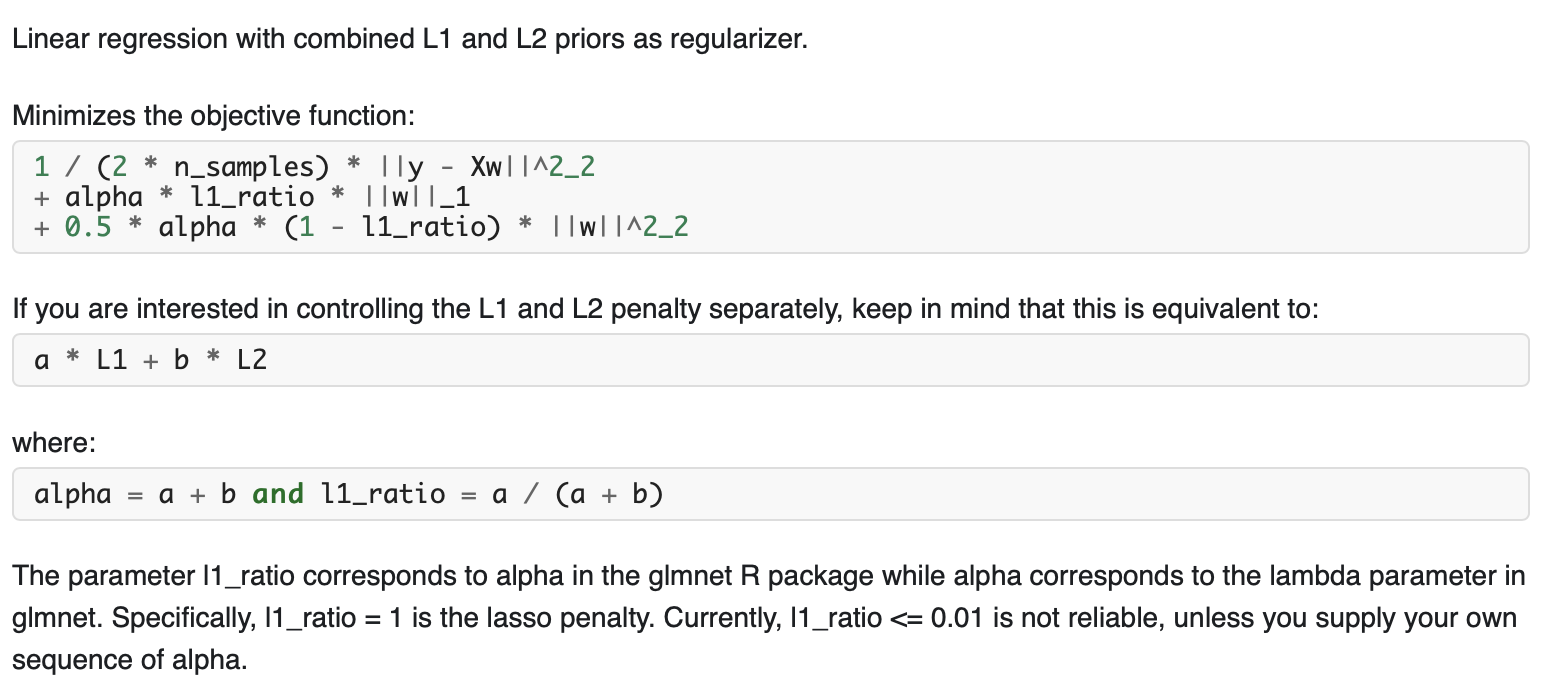

```
sklearn.linear_model.ElasticNet(alpha=1.0, 
                                l1_ratio=0.5, 
                                fit_intercept=True, 
                                normalize=False, 
                                precompute=False, 
                                max_iter=1000, 
                                copy_X=True, 
                                tol=0.0001, 
                                warm_start=False, 
                                positive=False, 
                                random_state=None, 
                                selection=’cyclic’)

```

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet


In [36]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(random_state=0).fit(X_train, y_train)

print("----------------- coef and intercept on ElasticNet model ------------------------")
print("Coefficients: en.coef_: {}".format(en.coef_))
print("Intercept: en.intercept_: {}".format(en.intercept_))
print("\n")

print("----------------- en model info ------------------------")
print(en)
print("\n")

print("----------------- scors on Train and Test data for en model ----------------------")
print("\n")
print("Traning set score: {:.2f}".format(en.score(X_train, y_train)))
print("Test set score: {:.2f}".format(en.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(en.coef_ !=0)))

----------------- coef and intercept on ElasticNet model ------------------------
Coefficients: en.coef_: [-0.          0.07847328 -0.39544504  0.         -0.03773639  0.36147212
 -0.12250665  0.         -0.21072681 -0.50505697 -0.60918798  0.
 -0.92162055 -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.06705207  0.         -0.041806    0.         -0.         -0.
 -0.38954754 -0.         -0.         -0.15106842 -0.30397193 -0.
 -0.24961282  0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.11707957 -0.         -0.         -0.10108367 -0.15478866
 -0.         -0.12123449  0.66253056  0.          0.         -0.
 -0.         -0.          0.77362449 -0.         -0.44418819 -0.
 -0.28649362 -0.56056603 -0.81557

---
## 19. ElasticNetCV 
---

```
sklearn.linear_model.ElasticNetCV(l1_ratio=0.5, 
                                  eps=0.001, 
                                  n_alphas=100, 
                                  alphas=None, 
                                  fit_intercept=True, 
                                  normalize=False, 
                                  precompute=’auto’, 
                                  max_iter=1000, 
                                  tol=0.0001, 
                                  cv=’warn’, 
                                  copy_X=True, 
                                  verbose=0, 
                                  n_jobs=None, 
                                  positive=False, 
                                  random_state=None, 
                                  selection=’cyclic’)
```

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV


In [37]:
from sklearn.linear_model import ElasticNetCV

encv = ElasticNetCV(cv=5).fit(X_train, y_train)

print("----------------- coef and intercept on ElasticNetCV model ------------------------")
print("Coefficients: encv.coef_: {}".format(encv.coef_))
print("Intercept: encv.intercept_: {}".format(encv.intercept_))
print("\n")

print("----------------- encv model info ------------------------")
print(encv)
print("\n")

print("----------------- scors on Train and Test data for encv model ----------------------")
print("\n")
print("Traning set score: {:.2f}".format(encv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(encv.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(encv.coef_ !=0)))

----------------- coef and intercept on ElasticNetCV model ------------------------
Coefficients: encv.coef_: [ -1.54451751  -1.69689836  -1.3388144    0.           0.
   9.03913369   0.          -5.55595757   5.91084514  -0.08585324
  -0.61051407   0.51973723  -3.36155224   0.           0.
  -0.50522091   0.16558587  -1.36573794  -1.05398665  -1.48006201
  -0.          -1.9601874   -1.51736645  -1.30122359  -1.40309467
  -0.25031769   2.49849818  -2.11390279   0.          -0.
   5.34343301  -1.82329388   0.           0.          -0.
   0.          -1.37236517  -3.08973452   3.71917322   0.56757239
   1.24099194  -4.0642418    2.54875469  -3.72440711   2.39989277
   3.38557869  -2.37383404  -0.          -3.66528868   0.
  -5.86729549  -3.48833136   3.29054013  -0.32108621   3.35813428
   2.55460686   0.9282312    1.92710122  -2.51474614  -0.91543516
  -2.94916133  -2.01990148  -0.41219808  -2.75206081  -1.33434245
  -3.0849216    0.3599468   -1.13176114  18.6113525   -1.37987656
   1.7

---
## 20. HuberRegressor 
---

Linear regression model that is robust to outliers.

The Huber Regressor optimizes the squared loss for the samples where |(y - X'w) / sigma| < epsilon and the absolute loss for the samples where |(y - X'w) / sigma| > epsilon, where w and sigma are parameters to be optimized. The parameter sigma makes sure that if y is scaled up or down by a certain factor, one does not need to rescale epsilon to achieve the same robustness. Note that this does not take into account the fact that the different features of X may be of different scales.

This makes sure that the loss function is not heavily influenced by the outliers while not completely ignoring their effect.


```
sklearn.linear_model.HuberRegressor(epsilon=1.35, 
                                    max_iter=100, 
                                    alpha=0.0001, 
                                    warm_start=False, 
                                    fit_intercept=True, 
                                    tol=1e-05)

```

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor

In [38]:
from sklearn.linear_model import HuberRegressor

hr = HuberRegressor().fit(X_train, y_train)

print("----------------- coef and intercept on HuberRegressor model ------------------------")
print("Coefficients: hr.coef_: {}".format(hr.coef_))
print("Intercept: hr.intercept_: {}".format(hr.intercept_))
print("\n")

print("----------------- hr model info ------------------------")
print(hr)
print("\n")

print("----------------- scors on Train and Test data for hr model ----------------------")
print("\n")
print("Traning set score: {:.2f}".format(hr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(hr.score(X_test, y_test)))
print("---------------------------------------------------------------")
print("The number of features used: {}".format(np.sum(hr.coef_ !=0)))

----------------- coef and intercept on HuberRegressor model ------------------------
Coefficients: hr.coef_: [-1.93127931e+00 -4.29042648e+00 -1.11874615e+00 -1.16743802e+00
  5.07843030e-01  1.35326054e+01  6.91262629e+00 -1.10477920e+01
  8.63355316e+00  7.95680711e-01 -9.50788249e-01  6.64163050e+00
  3.38031636e+00  5.64461325e+00  1.15379481e-02 -6.91058165e-01
  1.85144297e+00 -4.95381251e+00 -5.46044006e-01 -2.67522157e+00
  6.02901745e-01 -2.97552414e+00 -2.10814994e+00 -2.32321343e+00
  1.26307416e+00 -1.63927342e+00  1.32965671e+00 -5.63791455e+00
  2.57702199e+00 -2.52034731e+00  9.59610584e+00 -3.98729137e+00
  1.18855612e+00  3.81034804e+00  4.78995956e-01  3.21603447e+00
 -1.94124810e+00 -8.92145163e+00  7.02997967e+00  6.66584393e+00
  1.06382778e+01 -2.60947425e+00  3.68163567e+00 -2.81370824e+00
  4.56203172e+00  4.41377760e+00 -6.73804772e+00 -1.09332649e+00
 -1.23564788e+01 -1.16743802e+00 -1.35051465e+01 -6.44922080e+00
  2.17181402e+00 -9.40264783e-01  4.24910861e